# Exploring data using pandas

Finnish university students are encouraged to use the CSC Notebooks platform.<br/>
<a href="https://notebooks.csc.fi/"><img alt="CSC badge" src="https://img.shields.io/badge/launch-CSC%20notebook-blue.svg" style="vertical-align:text-bottom"></a>

Others can follow the lesson and fill in their student notebooks using Binder.<br/>
<a href="https://mybinder.org/v2/gh/geo-python/notebooks/master?urlpath=lab/tree/L5/exploring-data-using-pandas.ipynb"><img alt="Binder badge" src="https://img.shields.io/badge/launch-binder-red.svg" style="vertical-align:text-bottom"></a>

Our first task in this week's lesson is to learn how to read and explore data files in Python. We will focus on using [pandas](https://pandas.pydata.org/pandas-docs/stable/) which is an open-source package for data analysis in Python. pandas is an excellent toolkit for working with *real world data* that often have a tabular structure (rows and columns).

We will first get familiar with the pandas data structures: *DataFrame* and *Series*:

![pandas data structures](img/pandas-structures.png)

- **pandas DataFrame** (a 2-dimensional data structure) is used for storing and mainpulating table-like data (data with rows and columns) in Python. You can think of a pandas DataFrame as a programmable spreadsheet. 
- **pandas Series** (a 1-dimensional data structure) is used for storing and manipulating a sequence of values. pandas Series is kind of like a list, but more clever. One row or one column in a pandas DataFrame is actually a pandas Series. 

These pandas structures incorporate a number of things we've already encountered, such as indices, data stored in a collection, and data types. Let's have another look at the pandas data structures below with some additional annotation.

![pandas data structures annotated](img/pandas-structures-annotated.png)

As you can see, both DataFrames and Series in pandas have an index that can be used to select values, but they also have column labels to identify columns in DataFrames. In the lesson this week we'll use many of these features to explore real-world data and learn some useful data analysis procedures.

For a comprehensive overview of pandas data structures you can have a look at [Chapter 5](https://wesmckinney.com/book/pandas-basics) in Wes McKinney's book [Python for Data Analysis (3rd Edition, 2022)](https://wesmckinney.com/book/) and the [pandas online documentation about data structures](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html).

**Note**: pandas is a "high-level" package, which means that it makes use of several other packages such as [NumPy](https://numpy.org/) in the background. There are several ways in which data can be read from a file in Python, and for several years now we have decided to focus primarily on pandas because it is easy-to-use, efficient and intuitive. If you are curoius about other approaches for interacting with data files, you can find lesson materials from previous years about reading data using [NumPy](https://geo-python-site.readthedocs.io/en/2018.1/notebooks/L5/numpy/1-Exploring-data-using-numpy.html#Reading-a-data-file-with-NumPy) or [built-in Python functions](https://geo-python-site.readthedocs.io/en/2017.1/lessons/L5/reading-data-from-file.html).

## Input data: weather statistics

Our input data is a text file containing weather observations from Kumpula, Helsinki, Finland retrieved from [NOAA](https://www.ncdc.noaa.gov/)*:

- File name: [Kumpula-June-2016-w-metadata.txt](Kumpula-June-2016-w-metadata.txt) (have a look at the file before reading it in using pandas!)
- The file is available in the binder and CSC notebook instances, under the L5 folder 
- The data file contains observed daily mean, minimum, and maximum temperatures from June 2016 recorded from the Kumpula weather observation station in Helsinki.
- There are 30 rows of data in this sample data set.
- The data has been derived from a data file of daily temperature measurments downloaded from [NOAA](https://www.ncdc.noaa.gov/cdo-web/).

\*US National Oceanographic and Atmospheric Administration's National Centers for Environmental Information climate database

## Reading a data file with pandas

Now we're ready to read in our temperature data file. First, we need to import the pandas module. It is customary to import pandas as `pd`:

In [1]:
import pandas as pd

Next, we'll read the input data file, and store the contents of that file in a variable called `data` Using the `pandas.read_csv()` function:

In [2]:
# Read the file using pandas
data = pd.read_csv("Kumpula-June-2016-w-metadata.txt", sep=",")

#### Delimiter and other optional parameters

Our input file is a comma-delimited file; columns in the data are separted by commas (`,`) on each row. The pandas `.read_csv()` function has the comma as the default delimiter so we don't need to specify it separately. In order to make the delimiter visible also in the code for reading the file, could add the `sep` parameter:
    
```python
data = pd.read_csv('Kumpula-June-2016-w-metadata.txt', sep=`,`)
```
    
The `sep` parameter can be used to specify whether the input data uses some other character, such as `;` as a delimiter. For a full list of available parameters, please refer to the [pandas documentation for pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), or run `help(pd.read_csv)`.

#### Reading different file formats

`pandas.read_csv()` is a general function for reading data files separated by commas, spaces, or other common separators. 

pandas has several different functions for parsing input data from different formats. There is, for example, a separate function for reading Excel files `read_excel`. Another useful function is `read_pickle` for reading data stored in the [Python pickle format](https://docs.python.org/3/library/pickle.html). Check out the [pandas documentation about input and output functions](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-tools-text-csv-hdf5) and [Chapter 6](https://wesmckinney.com/book/accessing-data) in McKinney (2022) for more details about reading data.

If all goes as planned, you should now have a new variable `data` in memory that contains the input data. 

Let's check the the contents of this variable by calling `data` or `print(data)`:

In [3]:
data

,# Data file contents: Daily temperatures (mean,min,max) for Kumpula,Helsinki
0,# for June 1-30,2016,NaN,NaN
1,# Data source: https://www.ncdc.noaa.gov/cdo-w...,NaN,NaN,NaN
2,# Data processing: Extracted temperatures from...,converted to,NaN,NaN
3,# comma-separated format,NaN,NaN,NaN
4,#,NaN,NaN,NaN
5,# David Whipp - 02.10.2017,NaN,NaN,NaN
6,YEARMODA,TEMP,MAX,MIN
7,20160601,65.5,73.6,54.7
8,20160602,65.8,80.8,55.0
9,20160603,68.4,NaN,55.6


This looks OK, but there are some strange values present such as `NaN`, and the first lines of the dataframe look a bit weird.

`NaN` stands for "not a number", and might indicate some problem with reading in the contents of the file. Plus, we expected about 30 lines of data, but the index values go up to 36 when we print the contents of the `data` variable. Looks like we need to investigate this further.

As we can observe, there are some metadata at the top of the file giving basic information about its contents and source. This isn't data we want to process, so we need to skip over that part of the file when we load it.

Here are the 8 first rows of data in the text file (note that the 8th row is blank):

```
# Data file contents: Daily temperatures (mean, min, max) for Kumpula, Helsinki
#                     for June 1-30, 2016
# Data source: https://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND
# Data processing: Extracted temperatures from raw data file, converted to
#                  comma-separated format
#
# David Whipp - 02.10.2017

```

Fortunately, skipping over rows is easy to do when reading in data using pandas. We just need to add the `skiprows` parameter when we read the file, listing the number of rows to skip (8 in this case).

Let's try reading the datafile again, and this time defining the `skiprows` parameter.

In [4]:
data = pd.read_csv("Kumpula-June-2016-w-metadata.txt", sep=",", skiprows=8)

Let's now print the dataframe and see what changed:

In [5]:
data

,YEARMODA,TEMP,MAX,MIN
0,20160601,65.5,73.6,54.7
1,20160602,65.8,80.8,55.0
2,20160603,68.4,NaN,55.6
3,20160604,57.5,70.9,47.3
4,20160605,51.4,58.3,43.2
5,20160606,52.2,59.7,42.8
6,20160607,56.9,65.1,45.9
7,20160608,54.2,NaN,47.5
8,20160609,49.4,54.1,45.7
9,20160610,49.5,55.9,43.0


After reading in the data, it is always good to check that everything went well by printing out the data as we did here. However, often it is enough to have a look at the top few rows of the data. 

We can use the `.head()` function of the pandas DataFrame object to quickly check the top rows. By default, the `.head()` function returns the first 5 rows of the DataFrame:

In [8]:
data.head(6)

,YEARMODA,TEMP,MAX,MIN
0,20160601,65.5,73.6,54.7
1,20160602,65.8,80.8,55.0
2,20160603,68.4,NaN,55.6
3,20160604,57.5,70.9,47.3
4,20160605,51.4,58.3,43.2
5,20160606,52.2,59.7,42.8


We can also check the last rows of the data using `data.tail()`:

In [7]:
data.tail(6)

,YEARMODA,TEMP,MAX,MIN
24,20160625,65.7,75.4,57.9
25,20160626,69.6,77.7,60.3
26,20160627,60.7,70.0,NaN
27,20160628,65.4,73.0,55.8
28,20160629,65.8,73.2,NaN
29,20160630,65.7,72.7,59.2


Note that pandas DataFrames have *labeled axes* (rows and columns). In our sample data, the rows labeled with an index value (`0` to `29`), and columns labelled `YEARMODA`, `TEMP`, `MAX`, and `MIN`. Later on, we will learn how to use these labels for selecting and updating subsets of the data.

Let's also confirm the data type of our data variable:

In [9]:
type(data)

pandas.core.frame.DataFrame

No surprises here, our data variable is a pandas DataFrame.

#### Check your understanding

Read the file `Kumpula-June-2016-w-metadata.txt` in again and store its contents in a new variable called `temp_data`. In this case you should only read in the columns `YEARMODA` and `TEMP`, so the new variable `temp_data` should have 30 rows and 2 columns. You can achieve this using the `usecols` parameter when reading in the file. Feel free to check for more help in the [pandas.read_csv documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [13]:
# Type in your solution below
temp_data = pd.read_csv("Kumpula-June-2016-w-metadata.txt", sep=",", skiprows=8, usecols=["YEARMODA","TEMP"])
temp_data

,YEARMODA,TEMP
0,20160601,65.5
1,20160602,65.8
2,20160603,68.4
3,20160604,57.5
4,20160605,51.4
5,20160606,52.2
6,20160607,56.9
7,20160608,54.2
8,20160609,49.4
9,20160610,49.5


## DataFrame properties

Let's continue with the full data set that we have stored in the variable `data` and explore it's contents further. 
A normal first step when you load new data is to explore the dataset a bit to understand how the data is structured, and what kind of values are stored in there.

Let's start by checking the size of our data frame. We can use the `len()` function similar to the one we use with lists to check how many rows we have:

In [14]:
# Check the number of rows
len(data)

30

We can also get a quick sense of the size of the dataset using the `shape` attribute.


In [15]:
# Check dataframe shape (number of rows, number of columns)
data.shape

(30, 4)

Here we see that our dataset has 30 rows and 4 columns, just as we saw above when printing out the entire DataFrame.

**Note**: `shape` is one of the several [attributes related to a pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#attributes-and-underlying-data).

We can also check the column names we have in our DataFrame. We already saw the column names when we checked the 5 first rows using `data.head()`, but often it is useful to access the column names directly. You can check the column names by calling `data.columns` (returns an index object that contains the column labels) or `data.columns.values`:

In [17]:
# Print column names
data.columns.to_list()

['YEARMODA', 'TEMP', 'MAX', 'MIN']

We can also find information about the row identifiers using the `index` attribute:

In [18]:
# Print index
data.index

RangeIndex(start=0, stop=30, step=1)

Here we see how the data is indexed, starting at 0, ending at 30, and with an increment of 1 between each value. This is basically the same way in which Python lists are indexed, however, pandas also allows other ways of identifying the rows. DataFrame indices could, for example, be character strings, or date objects. We will learn more about resetting the index later.

What about the data types of each column in our DataFrame? We can check the data type of all columns at once using `pandas.DataFrame.dtypes`:

In [19]:
# Print data types
data.dtypes

YEARMODA      int64
TEMP        float64
MAX         float64
MIN         float64
dtype: object

Here we see that `YEARMODA` is an integer value (with 64-bit precision; `int64`), while the other values are all decimal values with 64-bit precision (`float64`).

#### Check your understanding

See if you can find a way to print out the number of columns in our DataFrame.

In [21]:
# Type in your solution below
len(data.columns)

4

## Selecting columns

We can select specific columns based on the column values. The basic syntax is `dataframe[value]`, where value can be a single column name, or a list of column names. Let's start by selecting two columns, `'YEARMODA'` and `'TEMP'`:

In [22]:
data[["YEARMODA","TEMP"]]

,YEARMODA,TEMP
0,20160601,65.5
1,20160602,65.8
2,20160603,68.4
3,20160604,57.5
4,20160605,51.4
5,20160606,52.2
6,20160607,56.9
7,20160608,54.2
8,20160609,49.4
9,20160610,49.5


Let's also check the data type of this selection:

In [23]:
type(data[["YEARMODA","TEMP"]])

pandas.core.frame.DataFrame

The subset is still a pandas DataFrame, and we are able to use all the methods and attributes related to a pandas DataFrame also with this subset. For example, we can check the shape:

We can also access a single column of the data based on the column name:

In [24]:
data[["YEARMODA","TEMP"]]["TEMP"]

0     65.5
1     65.8
2     68.4
3     57.5
4     51.4
5     52.2
6     56.9
7     54.2
8     49.4
9     49.5
10    54.0
11    55.4
12    58.3
13    59.7
14    63.4
15    57.8
16    60.4
17    57.3
18    56.3
19    59.3
20    62.6
21    61.7
22    60.9
23    61.1
24    65.7
25    69.6
26    60.7
27    65.4
28    65.8
29    65.7
Name: TEMP, dtype: float64

What about the type of the column itself?

In [26]:
# Check datatype of the column
data.YEARMODA

0     20160601
1     20160602
2     20160603
3     20160604
4     20160605
5     20160606
6     20160607
7     20160608
8     20160609
9     20160610
10    20160611
11    20160612
12    20160613
13    20160614
14    20160615
15    20160616
16    20160617
17    20160618
18    20160619
19    20160620
20    20160621
21    20160622
22    20160623
23    20160624
24    20160625
25    20160626
26    20160627
27    20160628
28    20160629
29    20160630
Name: YEARMODA, dtype: int64

Each column (and each row) in a pandas data frame is actually a pandas Series - a one-dimensional data structure!

**Note**: You can also retreive a column using a different syntax:
    
``` 
data.TEMP
```

This syntax works only if the column name is a valid name for a Python variable (e.g. the column name should not contain whitespace).
The syntax `data["column"]` works for all kinds of column names, so we recommend using this approach.

## Descriptive statistics

pandas DataFrames and Series contain useful methods for getting summary statistics. Available methods include `mean()`, `median()`, `min()`, `max()`, and `std()` (the standard deviation).

We could, for example, check the mean temperature in our input data. We check the mean for a single column (*Series*): 

In [29]:
# Check mean value of a column
data.TEMP.mean()

59.730000000000004

and for all columns (in the *DataFrame*):

In [30]:
# Check mean value for all columns
data.mean()

YEARMODA    2.016062e+07
TEMP        5.973000e+01
MAX         6.804074e+01
MIN         5.125714e+01
dtype: float64

For an overview of the basic statistics for all attributes in the data, we can use the `describe()` method:


In [31]:
# Get descriptive statistics
data.describe()

,YEARMODA,TEMP,MAX,MIN
count,3.000000e+01,30.000000,27.000000,28.000000
mean,2.016062e+07,59.730000,68.040741,51.257143
std,8.803408e+00,5.475472,6.505575,5.498985
min,2.016060e+07,49.400000,54.100000,41.700000
25%,2.016061e+07,56.450000,64.650000,46.975000
50%,2.016062e+07,60.050000,69.100000,53.100000
75%,2.016062e+07,64.900000,72.050000,55.600000
max,2.016063e+07,69.600000,80.800000,60.300000


#### Check your understanding

It doesn't make much sense to print out descriptive statistics for the `YEARMODA` column now that the values are stored as integer values (and not datetime objects, which we will learn about in later lessons). 

See if you can print out the descriptive statistics again, this time only for columns `TEMP`, `MAX`, `MIN`:

In [33]:
data.dtypes

YEARMODA      int64
TEMP        float64
MAX         float64
MIN         float64
dtype: object

In [34]:
# Type in your solution below
data.describe(exclude=["int64"])

,TEMP,MAX,MIN
count,30.000000,27.000000,28.000000
mean,59.730000,68.040741,51.257143
std,5.475472,6.505575,5.498985
min,49.400000,54.100000,41.700000
25%,56.450000,64.650000,46.975000
50%,60.050000,69.100000,53.100000
75%,64.900000,72.050000,55.600000
max,69.600000,80.800000,60.300000


## Very basic plots (*optional*)

Visualizing the data is a key part of data exploration, and pandas comes with a handful of plotting methods, which all rely on the [Matplotlib](https://matplotlib.org/) plotting library. 

For very basic plots, we don’t need to import Matplotlib separately. We can already create very simple plots using the `DataFrame.plot` method. 

Let's plot all the columns that contain values related to temperatures:

<Axes: >

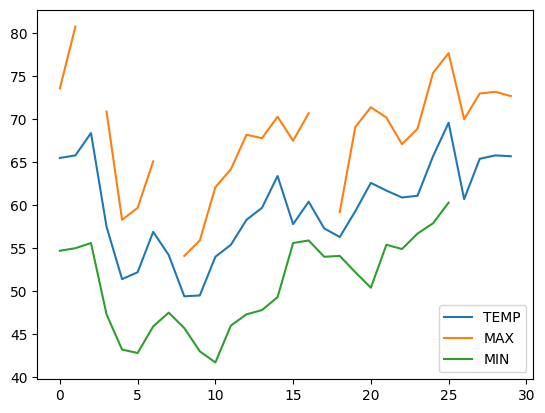

In [35]:
data[["TEMP", "MAX", "MIN"]].plot()

Now you might want to start modifying the plot by adding axis labels, color settings and other formatting. We will learn all this during week 7!

## From lists to pandas objects (*optional*)

Most often we create pandas objects by reading in data from an external source, such as a text file. Here, we will briefly see how you can create pandas objects from Python lists. If you have long lists of numbers, for instance, creating a pandas Series will allow you to interact with these values more efficiently in terms of computing time.

In [36]:
# Create pandas Series from a list
number_series = pd.Series([4, 5, 6, 7.0])
print(number_series)

0    4.0
1    5.0
2    6.0
3    7.0
dtype: float64


Note that pandas is smart about the conversion, detecting a single floating point value (`7.0`) and assigning all values in the Series the data type `float64`.

If needed, you can also set a custom index when creating the object:

In [37]:
number_series = pd.Series([4, 5, 6, 7.0], index=["a", "b", "c", "d"])
print(number_series)

a    4.0
b    5.0
c    6.0
d    7.0
dtype: float64


In [38]:
type(number_series)

pandas.core.series.Series

How about combining several lists as a DataFrame? Let's take a subset of the lists we used in Exercise 3, problem 3 and see how we could combine those as a pandas DataFrame:

In [39]:
# Station names
stations = [
    "Hanko Russarö",
    "Heinola Asemantaus",
    "Helsinki Kaisaniemi",
    "Helsinki Malmi airfield",
]

# Latitude coordinates of Weather stations
lats = [59.77, 61.2, 60.18, 60.25]

# Longitude coordinates of Weather stations
lons = [22.95, 26.05, 24.94, 25.05]

Often we indeed create pandas DataFrames by reading in data (e.g. using `pd.read_csv(filename.csv)`), but sometimes you might also combine lists into a DataFrame inside the script using the `pandas.DataFrame` constructor. Here, we are using a *Python dictionary* `{"column_1": list_1, "column_2": list_2, ...}` to indicate the structure of our data. 

In [40]:
new_data = pd.DataFrame(data={"Station name": stations, "Latitude": lats, "Longitude": lons})
new_data

,Station name,Latitude,Longitude
0,Hanko Russarö,59.77,22.95
1,Heinola Asemantaus,61.20,26.05
2,Helsinki Kaisaniemi,60.18,24.94
3,Helsinki Malmi airfield,60.25,25.05


In [41]:
type(new_data)

pandas.core.frame.DataFrame

Often, you might start working with an empty data frame instead of existing lists:

In [42]:
df = pd.DataFrame()

In [43]:
print(df)

Empty DataFrame
Columns: []
Index: []


Check more details about available paramenters and methods from [the pandas.DataFrame documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas-dataframe).